In [18]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
import random

In [8]:
TRAIN_IMAGE_DIR = "../data/train/"

In [9]:
train_df = pd.read_csv("../data/Training_set.csv")
train_df

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop
...,...,...
12595,Image_12596.jpg,sitting
12596,Image_12597.jpg,clapping
12597,Image_12598.jpg,sitting
12598,Image_12599.jpg,dancing


<AxesSubplot:xlabel='label', ylabel='count'>

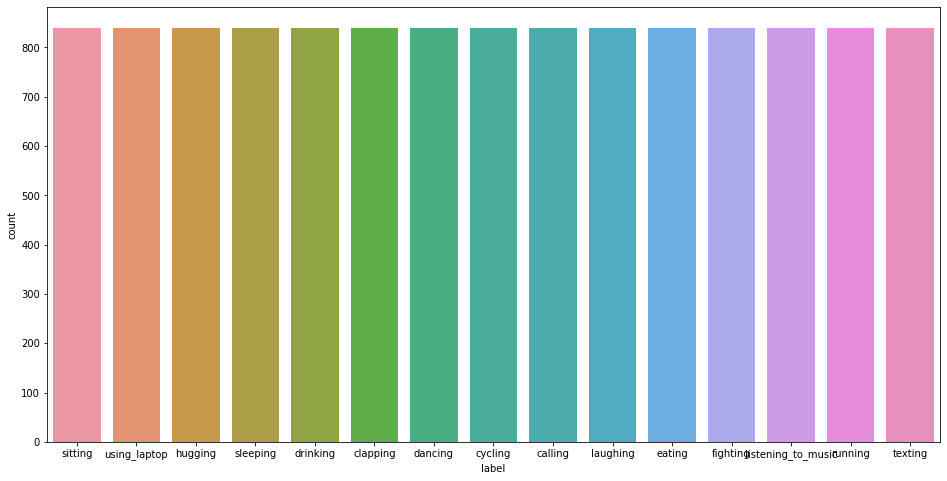

In [14]:
plt.figure(figsize=(16, 8))
sns.countplot(x='label', data=train_df)

In [19]:
image = Image.open(os.path.join(TRAIN_IMAGE_DIR, "Image_1.jpg"))

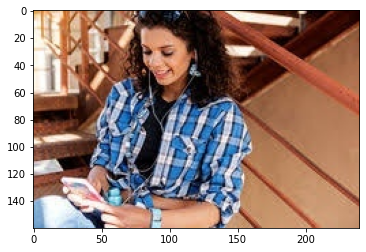

In [20]:
plt.imshow(image)

In [21]:
np.array(image).shape

(160, 240, 3)

In [23]:
from sklearn.metrics import roc_auc_score

In [29]:
y_probs = [[0.3, 0.3, 0.4], [0.2, 0.2, 0.6]]
y_gt = [[0, 0, 1], [0, 1, 0]]
roc_auc_score(y_gt, y_probs, average="micro", multi_class="ovr")

0.4375

In [ ]:
k = random.randint(0, df.shape[0]-1)
